<a href="https://colab.research.google.com/github/ProgrammerGnome/ANN-modeling/blob/feature%2FBasicsOfMLScripts/02/PTE_ML2HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Házi feladat diabetes adatcsomag betöltése, az oszlopok elemszámának ellenőrzése, ha kell korrigálása.
Számítsa ki az egyes oszlopok átlagait cimkénként (label) 0 és 1 es cimkék vannak.
Válogassuk le azokat az adatokat ahol a szülések száma kisebb mint 10.
Rajzoljon korellációs mátrixot.
Rajzolja meg az adatkészlethez tartozó hisztogramokat, milyen eloszlásokat ismer fel?


In [11]:
import pandas as pd
import io
import requests

#df = pd.read_csv("diabetes.csv")
df = pd.read_csv("https://raw.githubusercontent.com/karsarobert/Machine_Learning_2024/main/diabetes.csv")
# nézzük meg a dataframe első néhány adatát
print(df.head())

   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1


In [202]:
# nézzük meg a dataframe néhány leíró adatát átlag, szórás, min, max, 25%, ...

cosmetic = "\n\n"
print("Átlag:",cosmetic,df.mean(),end=cosmetic)
print("Szórás:",cosmetic,df.std(),end=cosmetic)
print("Medián:",cosmetic,df.median(numeric_only=True),end=cosmetic)
print("Minimum:",cosmetic,df.min(),end=cosmetic)
print("Maximum:",cosmetic,df.max(),end=cosmetic)

import numpy

def percentilisFuggveny(percentVar):
    print("A(z)", percentVar,"%-os percentilis:")
    transposedMatrix = numpy.transpose(df.values)

    percentilesList = []
    for row in transposedMatrix:
        percentilesList.append(numpy.percentile(row, percentVar))
    
    for element in range(len(df.values[0])-1):
        print(df.columns[element],": ",percentilesList[element],sep="")
    print("\n")

percentilisFuggveny(25)
percentilisFuggveny(50)
percentilisFuggveny(75)

Átlag: 

 pregnant      3.845052
glucose     120.894531
bp           69.105469
skin         20.536458
insulin      79.799479
bmi          31.992578
pedigree      0.471876
age          33.240885
label         0.348958
dtype: float64

Szórás: 

 pregnant      3.369578
glucose      31.972618
bp           19.355807
skin         15.952218
insulin     115.244002
bmi           7.884160
pedigree      0.331329
age          11.760232
label         0.476951
dtype: float64

Medián: 

 pregnant      3.0000
glucose     117.0000
bp           72.0000
skin         23.0000
insulin      30.5000
bmi          32.0000
pedigree      0.3725
age          29.0000
label         0.0000
dtype: float64

Minimum: 

 pregnant     0.000
glucose      0.000
bp           0.000
skin         0.000
insulin      0.000
bmi          0.000
pedigree     0.078
age         21.000
label        0.000
dtype: float64

Maximum: 

 pregnant     17.00
glucose     199.00
bp          122.00
skin         99.00
insulin     846.00
bmi        

In [98]:
# van-e hiányzó adatunk?

if(pd.isnull(df.columns).sum() != 0):
    print("Van hiányzó adat.")
else:
    print("Nincs hiányzó adat.")

Nincs hiányzó adat.


In [203]:
# csoportosítsuk az adatokat'label' szerint és vegyük azok átlagát

for element in range(len(df.values[0])-1):
    print(df.groupby('label')[df.columns[element]].mean(),"\n")

label
0    3.298000
1    4.865672
Name: pregnant, dtype: float64 

label
0    109.980000
1    141.257463
Name: glucose, dtype: float64 

label
0    68.184000
1    70.824627
Name: bp, dtype: float64 

label
0    19.664000
1    22.164179
Name: skin, dtype: float64 

label
0     68.792000
1    100.335821
Name: insulin, dtype: float64 

label
0    30.304200
1    35.142537
Name: bmi, dtype: float64 

label
0    0.429734
1    0.550500
Name: pedigree, dtype: float64 

label
0    31.190000
1    37.067164
Name: age, dtype: float64 



In [183]:
# Válogassuk le azokat az adatokat ahol a szülések száma kisebb mint 10

print(df[df['pregnant']<10])

# Ellenőrzés:

counter = 0
for row in df.values:
    if (row[0] >= 10):
        counter += 1
print("Number of rows: ",len(df.values)-counter)

     pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0           6      148  72    35        0  33.6     0.627   50      1
1           1       85  66    29        0  26.6     0.351   31      0
2           8      183  64     0        0  23.3     0.672   32      1
3           1       89  66    23       94  28.1     0.167   21      0
4           0      137  40    35      168  43.1     2.288   33      1
..        ...      ...  ..   ...      ...   ...       ...  ...    ...
762         9       89  62     0        0  22.5     0.142   33      0
764         2      122  70    27        0  36.8     0.340   27      0
765         5      121  72    23      112  26.2     0.245   30      0
766         1      126  60     0        0  30.1     0.349   47      1
767         1       93  70    31        0  30.4     0.315   23      0

[710 rows x 9 columns]
Number of rows:  710


In [ ]:
# Rajzoljon korellációs mátrixot.

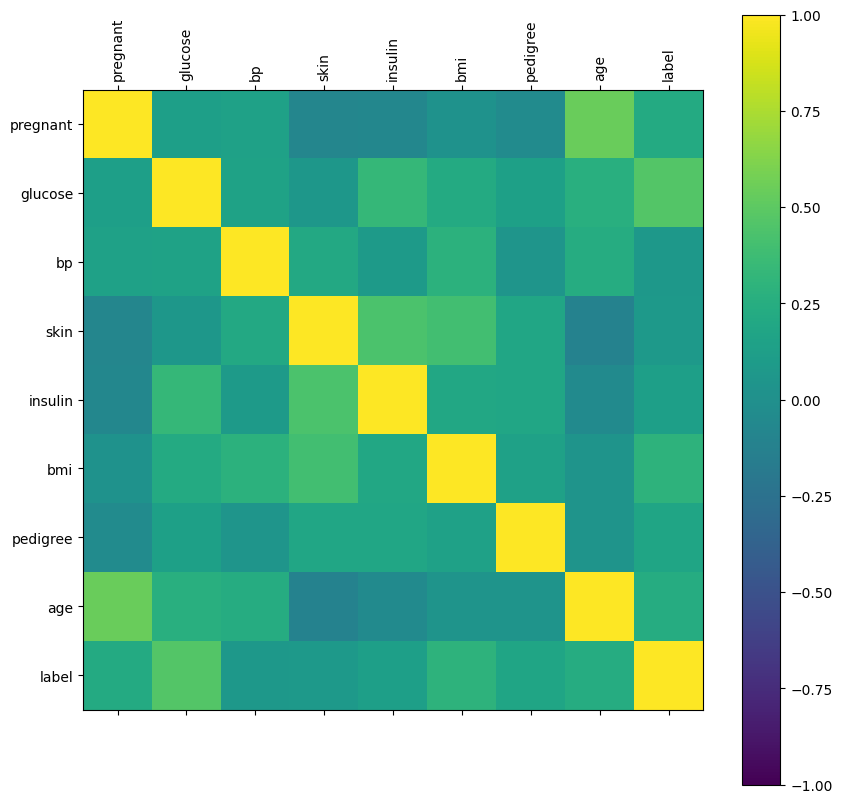

In [196]:
import matplotlib
import matplotlib.pyplot as plt

names = ['pregnant',
        'glucose',
        'bp',
        'skin',
        'insulin',
        'bmi',
        'pedigree',
        'age',
        'label']

correlations = df[['pregnant',
                    'glucose',
                    'bp',
                    'skin',
                    'insulin',
                    'bmi',
                    'pedigree',
                    'age',
                    'label']].corr()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation=90)
ax.set_yticklabels(names)

plt.show()

In [ ]:
# Rajzolja meg az adatkészlethez tartozó hisztogramokat, milyen eloszlásokat ismer fel?

array([[<Axes: title={'center': 'pregnant'}>,
        <Axes: title={'center': 'glucose'}>,
        <Axes: title={'center': 'bp'}>],
       [<Axes: title={'center': 'skin'}>,
        <Axes: title={'center': 'insulin'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'pedigree'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'label'}>]], dtype=object)

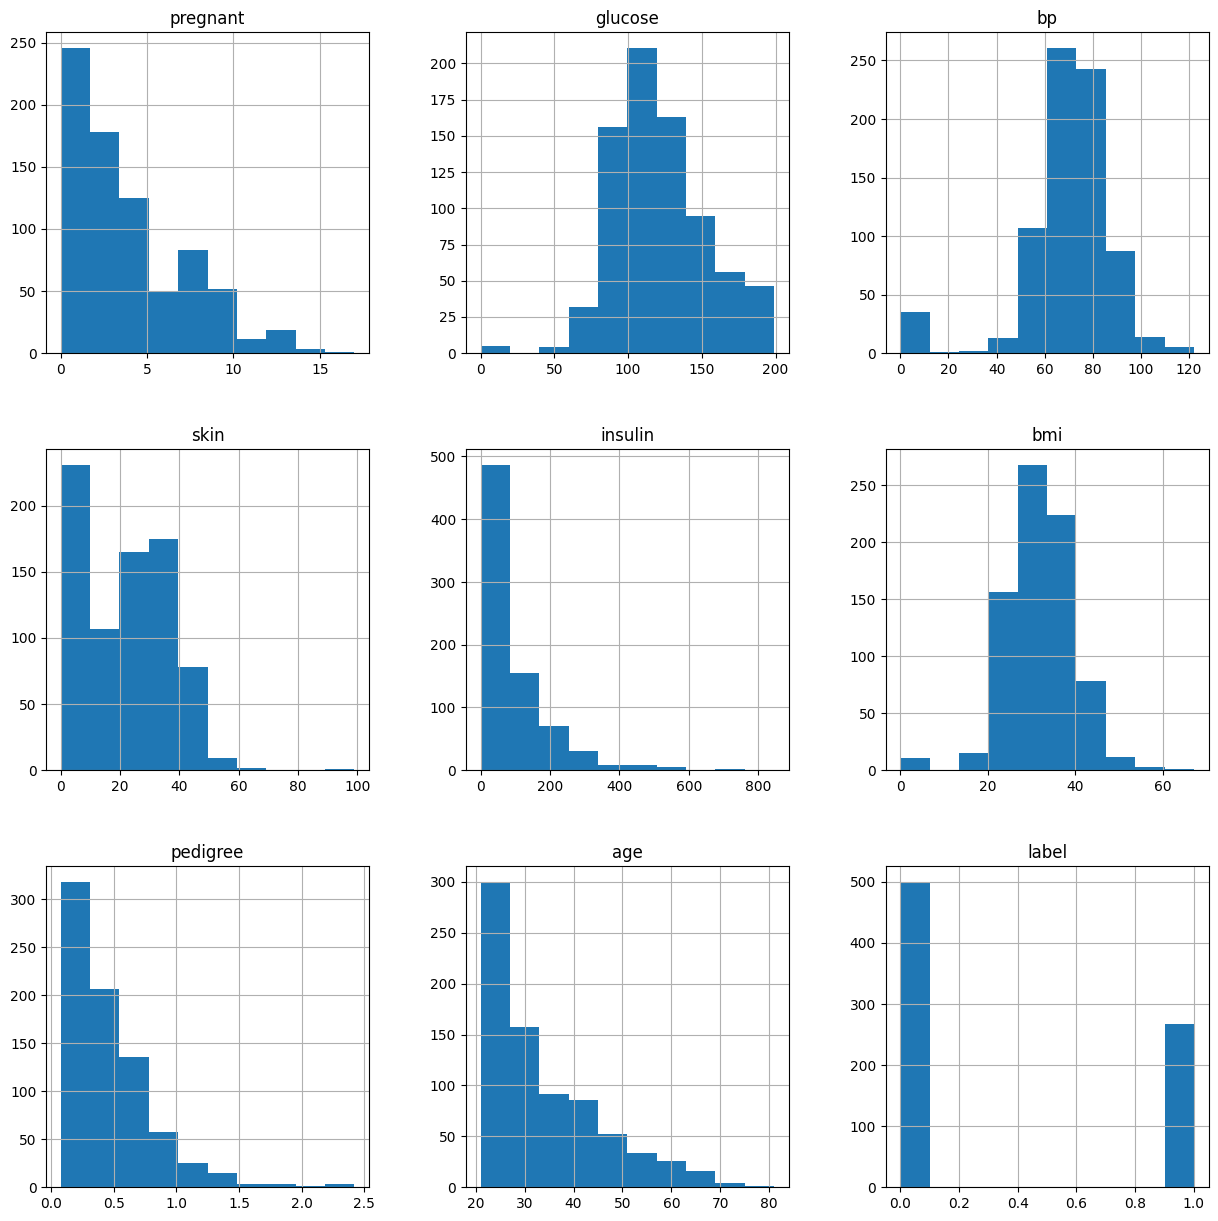

In [204]:
df.hist(figsize=(15, 15))

# Az insulin, pedigree, age ún. "hosszú farkú" eloszlás